In [2]:
import numpy as np
import matplotlib.pyplot as plt

#%% Functions
def randArrGen():
    
    dim1 = np.random.randint(1,20) 
    dim2 = np.random.randint(2,500)
    dimtup = ()
    
    #A silly condition, so that we have both cases
    if dim2%dim1 == 0 :
        dimtup = (dim1, dim2)
    
    else:
        dimtup = (dim1)
    
    #This way, rectangular arrays are created  
    
    return np.random.randint(0, 50, size=dimtup)    

def checkDim(aArray):
    
    is1Dim = False
    
    #for rectangular arrays, this is enough to verificate 1-dim
    if len(aArray.shape) == 1:
        is1Dim = True
    
    return is1Dim

def histogram(arr, arrMax, arrMin):
    
    #This could be done with np.histogram
    arrHist = np.array(range(arrMin, arrMax+1))
    arrCount = np.zeros(arrHist.shape)
    
    for i in arr:
        arrCount[arrHist[i - arrMin]-arrMin] += 1
    
    return arrHist, arrCount

def plotHistogram(x,y):
    
    plt.close()
    
    plt.interactive(True)    
    ax = plt.figure().gca()
    plt.title('Histograma de la matriu')
    plt.ylabel('Number of occurrence')
    plt.xlabel('Element in Array')
    
    #yAxis with only integers!!
    ax.yaxis.get_major_locator().set_params(integer=True)
    plt.grid()
    plt.bar(x,y)
    
def getMean(arr):
    
    #is len() or .size better?
    return np.sum(arr)/arr.size 

def getDesvest(arr, mean):

    return np.sqrt(np.sum((arr-mean)**2)/arr.size)
        
def nxn100(): #Random nxn (at most 50x50) matrixes
    
    dim = np.random.randint(1,50)     
    return np.random.randint(0, 101, size=(dim, dim))

def totalRowsColumns(arrNxn):
    
    sumRows = [np.sum(i) for i in arrNxn] #the elements inside the array, are the lists conforming the rows
    
    #To sum the columns we have to do a bit of slicing
    sumColumns = [np.sum(arrNxn[:,i]) for i in range(arrNxn.shape[1])]
                  
    return sumRows, sumColumns

def oneDimRandGen():
    dim = np.random.randint(50,200)
    
    return np.random.randint(0, 50, size= (dim))
    
def correlationCoef(x,y):
    
    xMean = getMean(x)    
    yMean = getMean(y)
    
    return (np.sum((x-xMean)*(y-yMean)))/(np.sqrt(np.sum((x-xMean)**2)*np.sum((y-yMean)**2)))

La moda es [[ 0 13 23 28 31 38 46 49]]
La mitjana es 28.5
La sigma es 15.435349040433131


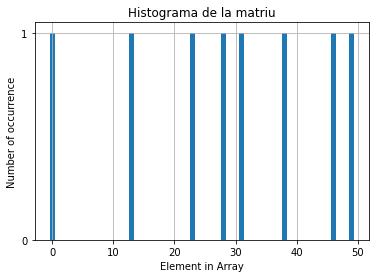

In [3]:
#%% Ex1

arr = randArrGen()

is1Dim = checkDim(arr)

if is1Dim:
    
    arrMax = np.amax(arr)
    arrMin = np.amin(arr)
    
    element, freq = histogram(arr, arrMax, arrMin)    
    plotHistogram(element, freq)
    
    #Works for more than one mode
    mode = np.where(freq == np.amax(freq) ) + arrMin
    print('La moda es', mode)
    
    mean = getMean(arr)
    print('La mitjana es', mean)
    
    desvest = getDesvest(arr, mean)
    print('La sigma es', desvest)
    
else:
    print('Error, la matriu hauria de tenir 1 dimensio')
    

In [4]:
#%% Ex2

nxn100 = nxn100()

print(nxn100)

[[  1  94  86  61  15  57   7  78  88  33  84  25  96  69  33  31  78  15
   73  11  84]
 [ 48  63  65  17  36  43  46  63  51   1  75  25  57  42  96  47  52   0
   35  52  97]
 [ 38   3  74  22  16  97  38  10  41  87  25  29  49  23  32  28   8  91
   55  41  86]
 [ 98  15  66  79   1  34   5  89  70  93  83  22  30  97  13  67  99  99
   13  42  16]
 [ 20  74  77  10  82  95  87  24  25  82  92  28  56  99  73  25  30   0
    4  12  20]
 [ 46  79  34  30  25  58  97  53  22  13  34  84  58  56  76  13  64  38
   92  43  83]
 [  5   6  38  87  86  16  96  36 100  45  50  94  78  48   4  54  77  39
   10   2  75]
 [ 58  99  86  84  47  95  64 100  83  33  13  87  90  55  21  80  21  63
   22  38  45]
 [  7  39  61   8  54  61  64  16  72  81  80  59  10  63  80  25  26   2
   16  47   7]
 [ 69  88  81  39  70  21  14  32  36  42  17  76  72  71  74   8  81  54
   78  27  36]
 [  5  21  11  77  96  22 100  89  96  76  10  25  16  57  66  91  79  36
   95  47  10]
 [ 19  48  44  30  38

In [5]:
#%% Ex3

sumRows, sumColumns = totalRowsColumns(nxn100)

print('Suma de les files:\n',sumRows)
print('Suma de les columnes:\n',sumColumns)

Suma de les files:
 [1119, 1011, 893, 1131, 1015, 1098, 1046, 1284, 878, 1086, 1125, 851, 833, 1177, 1145, 1104, 928, 1058, 1186, 1297, 1126]
Suma de les columnes:
 [769, 965, 1107, 1187, 1059, 1112, 1038, 1184, 1203, 1160, 1116, 1146, 1057, 1179, 1062, 958, 1158, 878, 1228, 860, 965]


In [6]:
#%% Ex4

x = oneDimRandGen()

#x = np.linspace(0,50,20) #This would yield a correlation coeficient of 1

y = np.linspace(100, 500, x.size) #For our function, both arrays must be the same length

print(correlationCoef(x, y))

-0.001442543034750261
